![Königsweg Logo](../img/koenigsweg_150.png)

<span style="font-size: small;float: right;">&copy; 2015-2020 Alexander C.S. Hendorf, <a href="http://koenigsweg.com">Königsweg GmbH</a>, Mannheim </span>

---

# Analytics with  Pandas and Jupyterlab

---

# DateTime Index & Resampling

---

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

### DateTimeIndex

Pandas logic was inspired by SQL.

In [2]:
sales_data = pd.read_excel('../data/blooth_sales_data_clean.xlsx')
sales_data['turnover'] = sales_data['units'] * sales_data['unitprice']
sales_data.head(5)

,name,birthday,customer,orderdate,product,units,unitprice,turnover
0,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.157,Thriller record,2,13.27,26.54
1,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.157,Corolla,26,24458.69,635925.94
2,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.157,Rubik’s Cube,41,15.79,647.39
3,Cori,1986-11-05,Signal Industries,2016-07-23 13:48:03.157,iPhone,16,584.01,9344.16
4,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.157,Harry Potter book,4,25.69,102.76


In [3]:
sales_data.index = sales_data['orderdate']
sales_data.head(5)

,name,birthday,customer,orderdate,product,units,unitprice,turnover
orderdate,,,,,,,,
2016-07-17 13:48:03.157,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.157,Thriller record,2,13.27,26.54
2016-07-06 13:48:03.157,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.157,Corolla,26,24458.69,635925.94
2016-07-22 13:48:03.157,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.157,Rubik’s Cube,41,15.79,647.39
2016-07-23 13:48:03.157,Cori,1986-11-05,Signal Industries,2016-07-23 13:48:03.157,iPhone,16,584.01,9344.16
2016-07-16 13:48:03.157,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.157,Harry Potter book,4,25.69,102.76


In [5]:
byday = sales_data.groupby(sales_data.index.weekday_name).mean()
byday

,units,unitprice,turnover
orderdate,,,
Friday,24.958333,2191.905000,68031.563125
Monday,26.961039,2029.196753,50831.003766
Saturday,27.467626,1430.240791,39743.422662
Sunday,24.482270,2693.664113,65708.101986
Thursday,26.946746,1992.235621,54042.491657
Tuesday,24.992908,2043.443404,60551.479007
Wednesday,24.535714,3315.356429,68836.291875


In [6]:
byday.index

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='orderdate')

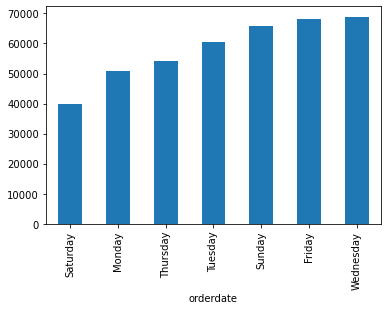

In [7]:
byday.sort_values('turnover')['turnover'].plot.bar()

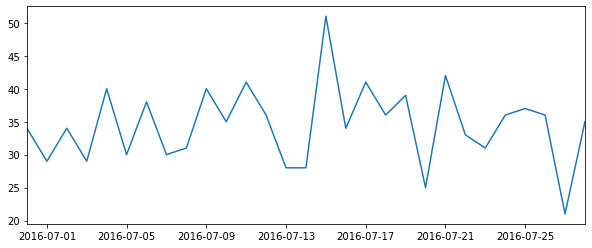

In [9]:
sales_data.groupby(sales_data.index.date).count()['customer'].plot(figsize=(10, 4));

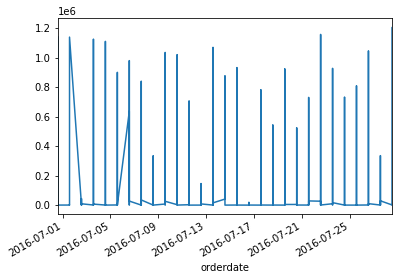

In [10]:
sales_data['turnover'].plot();

---

#### Excercise

Calcualte sum of the *turnover* per week and plot it in a barchart.

In [ ]:
# your code here


In [ ]:
# %load ../solutions/601.py

Calculate the *turnover* for the days on the weekend of every week and plot it as barchart.

In [ ]:
# your code here


In [ ]:
# %load ../solutions/602.py

 ---

#### Resampling

Another way...

In [11]:
sales_data.head(5)

,name,birthday,customer,orderdate,product,units,unitprice,turnover
orderdate,,,,,,,,
2016-07-17 13:48:03.157,Pasquale,1967-09-02,Electronics Inc,2016-07-17 13:48:03.157,Thriller record,2,13.27,26.54
2016-07-06 13:48:03.157,India,1968-12-13,Electronics Resource Group,2016-07-06 13:48:03.157,Corolla,26,24458.69,635925.94
2016-07-22 13:48:03.157,Wayne,1992-09-10,East Application Contract Inc,2016-07-22 13:48:03.157,Rubik’s Cube,41,15.79,647.39
2016-07-23 13:48:03.157,Cori,1986-11-05,Signal Industries,2016-07-23 13:48:03.157,iPhone,16,584.01,9344.16
2016-07-16 13:48:03.157,Chang,1972-04-23,Star Alpha Industries,2016-07-16 13:48:03.157,Harry Potter book,4,25.69,102.76


In [12]:
sales_data[['turnover', 'units']].resample('D').max().head()

,turnover,units
orderdate,,
2016-06-30,1143687.44,49
2016-07-01,1138801.50,50
2016-07-02,44068.12,50
2016-07-03,1125102.92,50
2016-07-04,1109942.74,50


In [13]:
sales_data[['turnover', 'units']].resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [14]:
sales_data[['turnover', 'units']].resample('3D').mean().head()

,turnover,units
orderdate,,
2016-06-30,54159.150103,27.917526
2016-07-03,71877.548283,26.626263
2016-07-06,47997.281515,24.272727
2016-07-09,62778.548190,27.086207
2016-07-12,45435.739565,25.565217


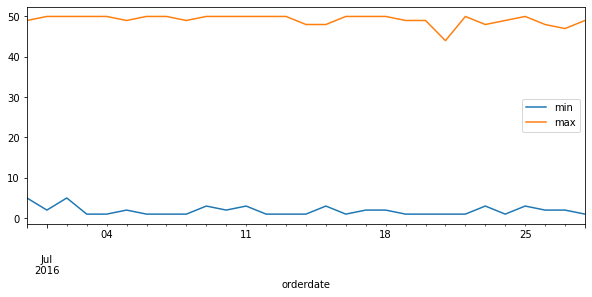

In [15]:
sales_data['units'].resample('D').agg([min, max]).plot(figsize=(10, 4));

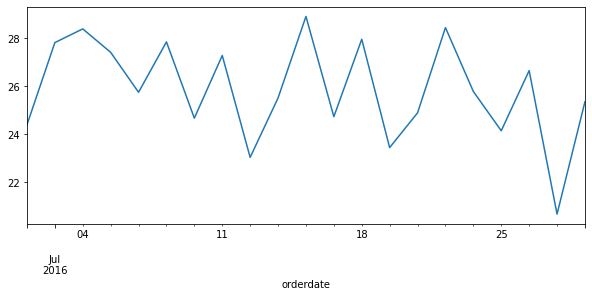

In [16]:
sales_data['units'].resample('B').mean().plot(figsize=(10, 4));

|Code|Freq|
|---|---|
|H|hourly frequency|
|T|minutely frequency|
|S |secondly frequency|
|L |milliseonds|
|U |microseconds|
|N |nanoseconds|
|D|calendar day frequency|
|W|weekly frequency|
|M|month end frequency|
|Q|quarter end frequency|
|A|year end frequency|
|||
|B|business day frequency|
|C|custom business day frequency (experimental) BM business month end frequency|
|CBM| custom business month end frequency|
|MS| month start frequency|
|BMS| business month start frequency|
|CBMS| custom business month start frequency|
|BQ |business quarter endfrequency|
|QS |quarter start frequency|
|BQS |business quarter start frequency|
|BA |business year end frequency|
|AS |year start frequency|
|BAS |business year start frequency|
|BH |business hour frequency|

---

### Exercise

Create a plot resampled by hours.

In [ ]:
# your code here


In [ ]:
# %load ../solutions/603.py

---

**`.bfill() / .ffill()`**

In [17]:
sales_data['units'].resample('6H').sum()

orderdate
2016-06-30 12:00:00     829
2016-06-30 18:00:00       0
2016-07-01 00:00:00       0
2016-07-01 06:00:00       0
2016-07-01 12:00:00     836
2016-07-01 18:00:00       0
2016-07-02 00:00:00       0
2016-07-02 06:00:00       0
2016-07-02 12:00:00    1043
2016-07-02 18:00:00       0
2016-07-03 00:00:00       0
2016-07-03 06:00:00       0
2016-07-03 12:00:00     679
2016-07-03 18:00:00       0
2016-07-04 00:00:00       0
2016-07-04 06:00:00       0
2016-07-04 12:00:00    1135
2016-07-04 18:00:00       0
2016-07-05 00:00:00       0
2016-07-05 06:00:00       0
2016-07-05 12:00:00     822
2016-07-05 18:00:00       0
2016-07-06 00:00:00       0
2016-07-06 06:00:00       0
2016-07-06 12:00:00     978
2016-07-06 18:00:00       0
2016-07-07 00:00:00       0
2016-07-07 06:00:00       0
2016-07-07 12:00:00     835
2016-07-07 18:00:00       0
                       ... 
2016-07-21 06:00:00       0
2016-07-21 12:00:00    1194
2016-07-21 18:00:00       0
2016-07-22 00:00:00       0
2016-07-22

In [18]:
sales_data['units'].resample('6H').sum().bfill()

orderdate
2016-06-30 12:00:00     829
2016-06-30 18:00:00       0
2016-07-01 00:00:00       0
2016-07-01 06:00:00       0
2016-07-01 12:00:00     836
2016-07-01 18:00:00       0
2016-07-02 00:00:00       0
2016-07-02 06:00:00       0
2016-07-02 12:00:00    1043
2016-07-02 18:00:00       0
2016-07-03 00:00:00       0
2016-07-03 06:00:00       0
2016-07-03 12:00:00     679
2016-07-03 18:00:00       0
2016-07-04 00:00:00       0
2016-07-04 06:00:00       0
2016-07-04 12:00:00    1135
2016-07-04 18:00:00       0
2016-07-05 00:00:00       0
2016-07-05 06:00:00       0
2016-07-05 12:00:00     822
2016-07-05 18:00:00       0
2016-07-06 00:00:00       0
2016-07-06 06:00:00       0
2016-07-06 12:00:00     978
2016-07-06 18:00:00       0
2016-07-07 00:00:00       0
2016-07-07 06:00:00       0
2016-07-07 12:00:00     835
2016-07-07 18:00:00       0
                       ... 
2016-07-21 06:00:00       0
2016-07-21 12:00:00    1194
2016-07-21 18:00:00       0
2016-07-22 00:00:00       0
2016-07-22

In [20]:
sales_data['units'].resample('6H').sum().ffill()

orderdate
2016-06-30 12:00:00     829
2016-06-30 18:00:00       0
2016-07-01 00:00:00       0
2016-07-01 06:00:00       0
2016-07-01 12:00:00     836
2016-07-01 18:00:00       0
2016-07-02 00:00:00       0
2016-07-02 06:00:00       0
2016-07-02 12:00:00    1043
2016-07-02 18:00:00       0
2016-07-03 00:00:00       0
2016-07-03 06:00:00       0
2016-07-03 12:00:00     679
2016-07-03 18:00:00       0
2016-07-04 00:00:00       0
2016-07-04 06:00:00       0
2016-07-04 12:00:00    1135
2016-07-04 18:00:00       0
2016-07-05 00:00:00       0
2016-07-05 06:00:00       0
2016-07-05 12:00:00     822
2016-07-05 18:00:00       0
2016-07-06 00:00:00       0
2016-07-06 06:00:00       0
2016-07-06 12:00:00     978
2016-07-06 18:00:00       0
2016-07-07 00:00:00       0
2016-07-07 06:00:00       0
2016-07-07 12:00:00     835
2016-07-07 18:00:00       0
                       ... 
2016-07-21 06:00:00       0
2016-07-21 12:00:00    1194
2016-07-21 18:00:00       0
2016-07-22 00:00:00       0
2016-07-22

In [21]:
sales_data['units'].resample('W').sum().ffill()

orderdate
2016-07-03    3387
2016-07-10    6384
2016-07-17    6585
2016-07-24    6313
2016-07-31    3173
Freq: W-SUN, Name: units, dtype: int64